<h3 
    align="center" 
    style="font-size: 80px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:10px;background-color:green">
    <span style="color: white;"> CAR PRICE PREDICION </span>
</h3>

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;">Importing Libraries  </span>
</h3>

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [45]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;">Exploratory Data Analysis(EDA)  </span>
</h3>

In [4]:
data[data['Owner']== 1]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual,1
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1
193,Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
205,grand i10,2016,5.25,5.70,3493,Petrol,Dealer,Manual,1
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual,1


In [5]:
data.shape

(301, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
data['Car_Name'].nunique()

98

In [9]:
data['Year'].nunique()

16

In [10]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
data.describe(include = 'all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [13]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
# Richest car From the given Dataset
data[data['Selling_Price'] == data['Selling_Price'].max()].head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [15]:
# A Car contains lowest Selling price
data[data['Selling_Price'] == data['Selling_Price'].min()].head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
200,Bajaj Pulsar 150,2006,0.1,0.75,92233,Petrol,Individual,Manual,0


In [26]:
# A Car contains lowest Driven kms
data[data['Driven_kms'] == data['Driven_kms'].min()].head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
133,Bajaj Avenger 220,2016,0.72,0.95,500,Petrol,Individual,Manual,0
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0


In [27]:
# A Car contains Highest Driven kms
data[data['Driven_kms'] == data['Driven_kms'].max()].head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [16]:
# Difference between the Selling_Price and Present_Price
diff = data['Selling_Price']- data['Present_Price']
diff[:6]

0   -2.24
1   -4.79
2   -2.60
3   -1.30
4   -2.27
5   -0.58
dtype: float64

In [31]:
data['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [28]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;">Data Visualization  </span>
</h3>

<AxesSubplot:>

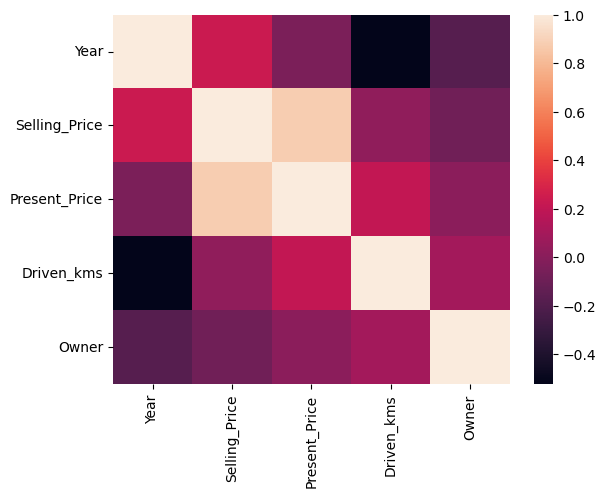

In [17]:
corr_mat = data.corr()
sns.heatmap(corr_mat)

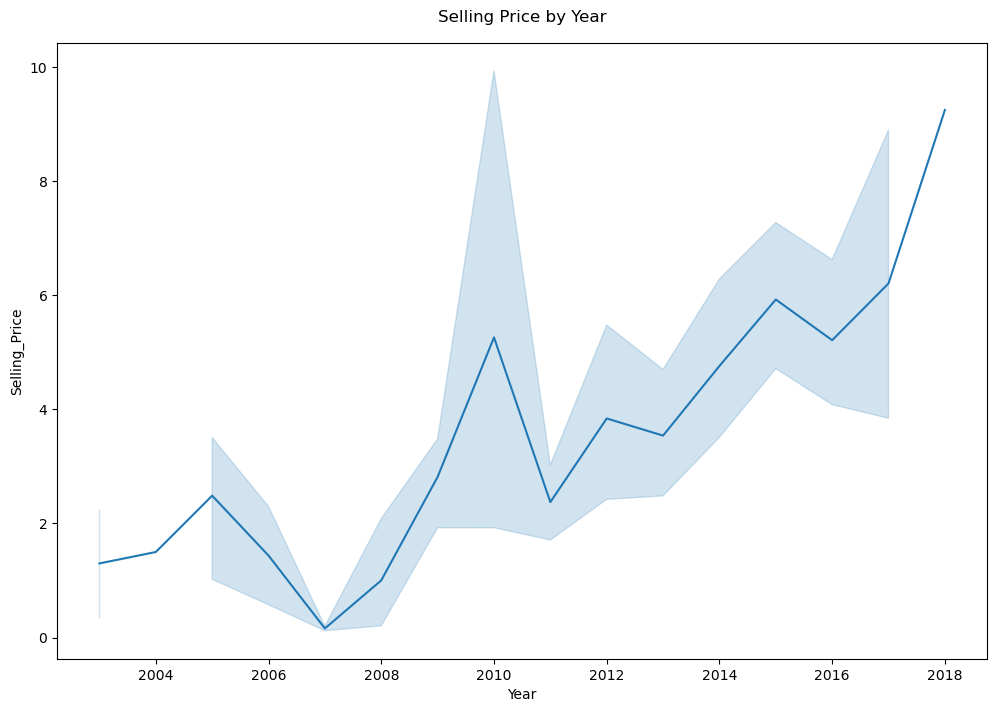

In [19]:
plt.figure(figsize = (12,8))
sns.lineplot(data = data, y = 'Selling_Price', x= 'Year')
plt.title('Selling Price by Year', pad = 15, loc = 'center')
plt.show()

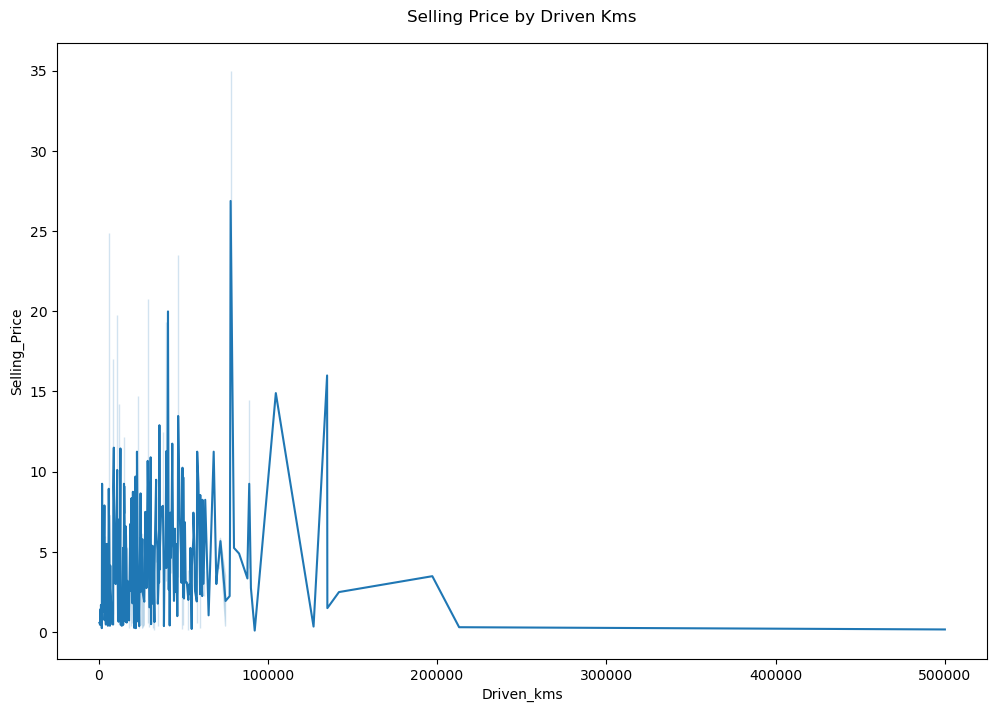

In [20]:
plt.figure(figsize = (12,8))
sns.lineplot(data = data, y = 'Selling_Price', x= 'Driven_kms')
plt.title('Selling Price by Driven Kms', pad = 15, loc = 'center')
plt.show()

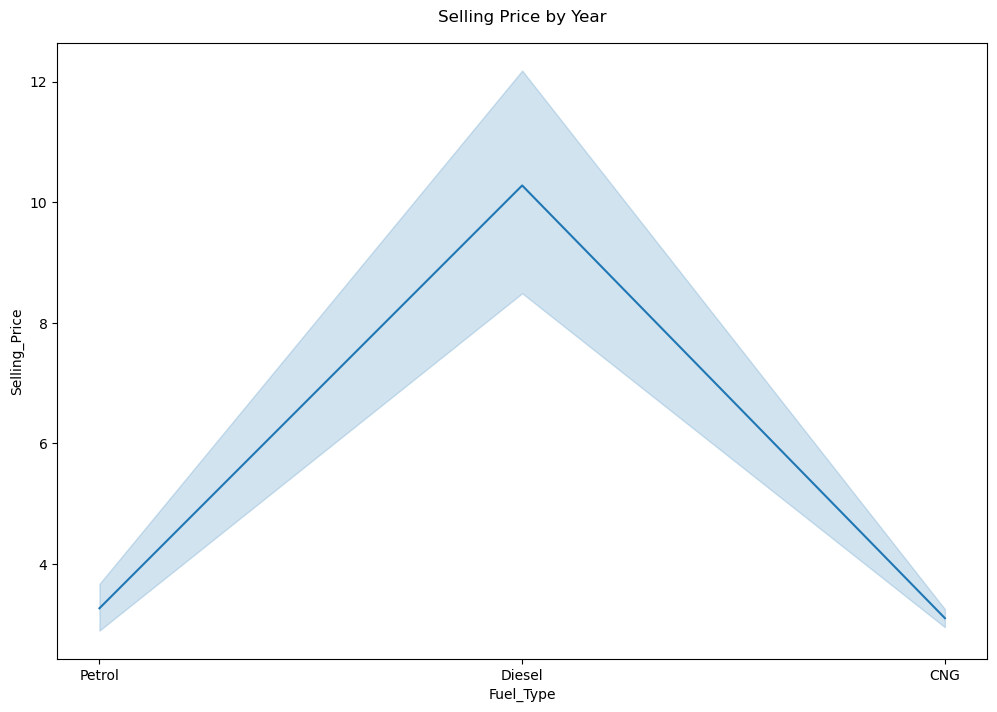

In [21]:
plt.figure(figsize = (12,8))
sns.lineplot(data = data, y = 'Selling_Price', x= 'Fuel_Type')
plt.title('Selling Price by Year', pad = 15, loc = 'center')
plt.show()

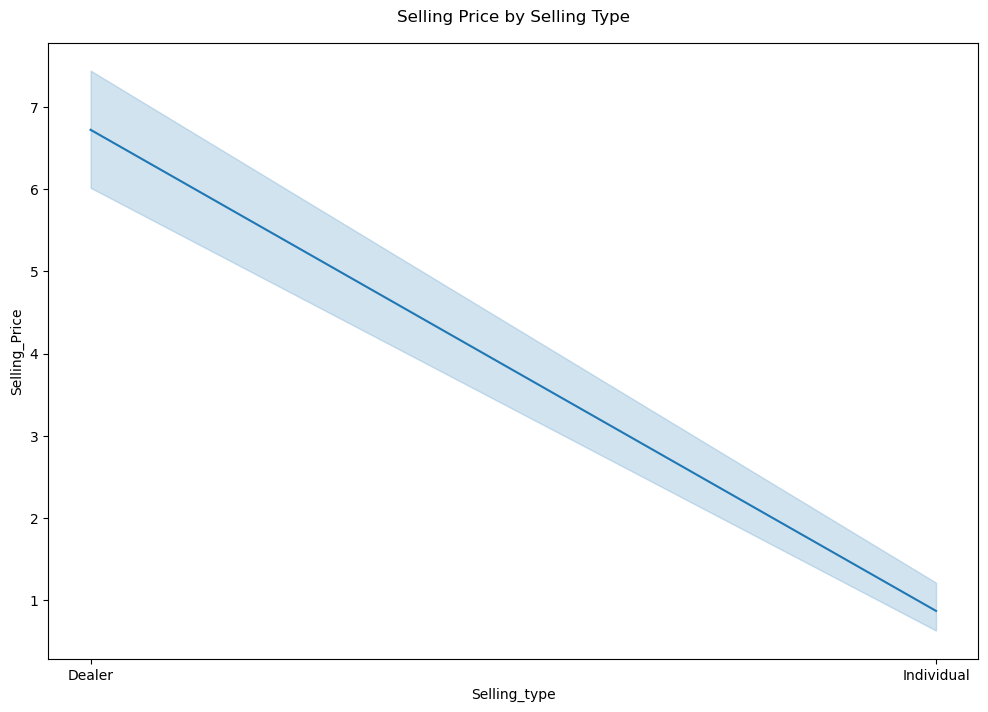

In [22]:
plt.figure(figsize = (12,8))
sns.lineplot(data = data, y = 'Selling_Price', x= 'Selling_type')
plt.title('Selling Price by Selling Type', pad = 15, loc = 'center')
plt.show()

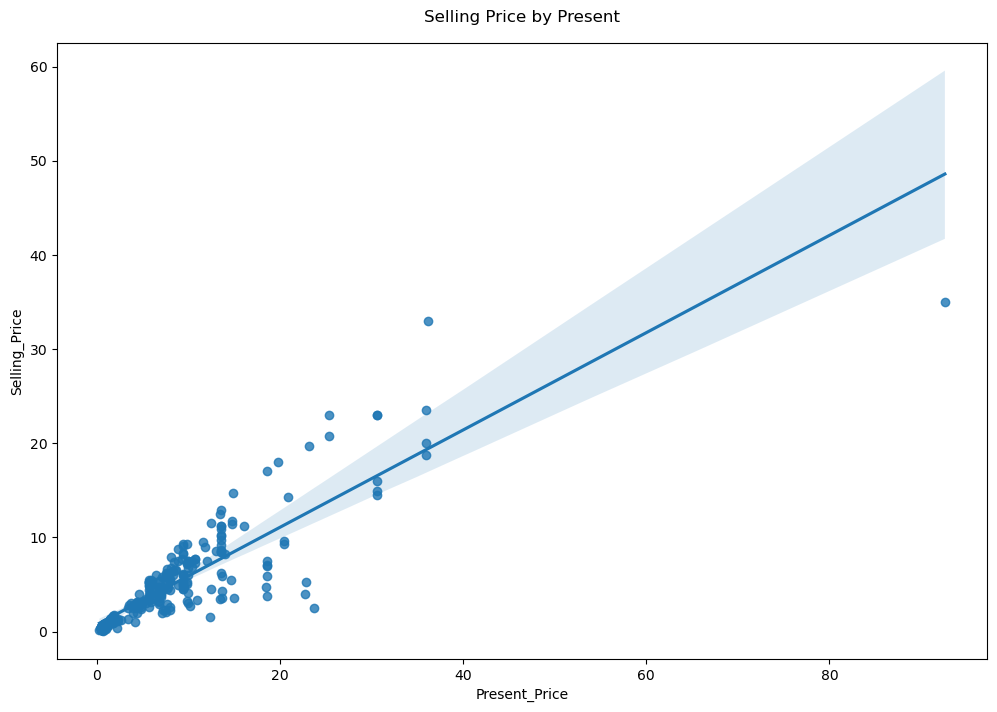

In [23]:
plt.figure(figsize = (12,8))
sns.regplot(data = data, y = 'Selling_Price', x= 'Present_Price')
plt.title('Selling Price by Present', pad = 15, loc = 'center')
plt.show()

F:\program files\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

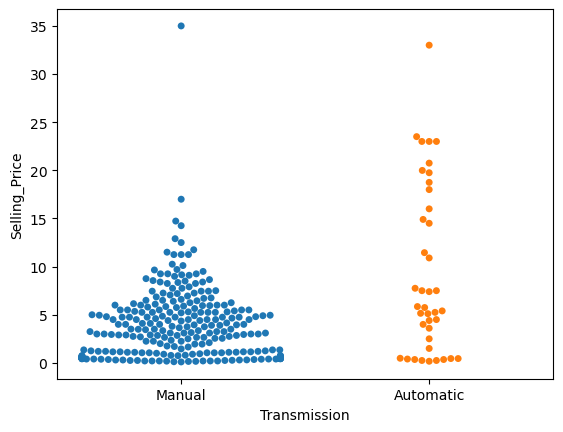

In [32]:
sns.swarmplot(data = data, x = 'Transmission', y = 'Selling_Price')

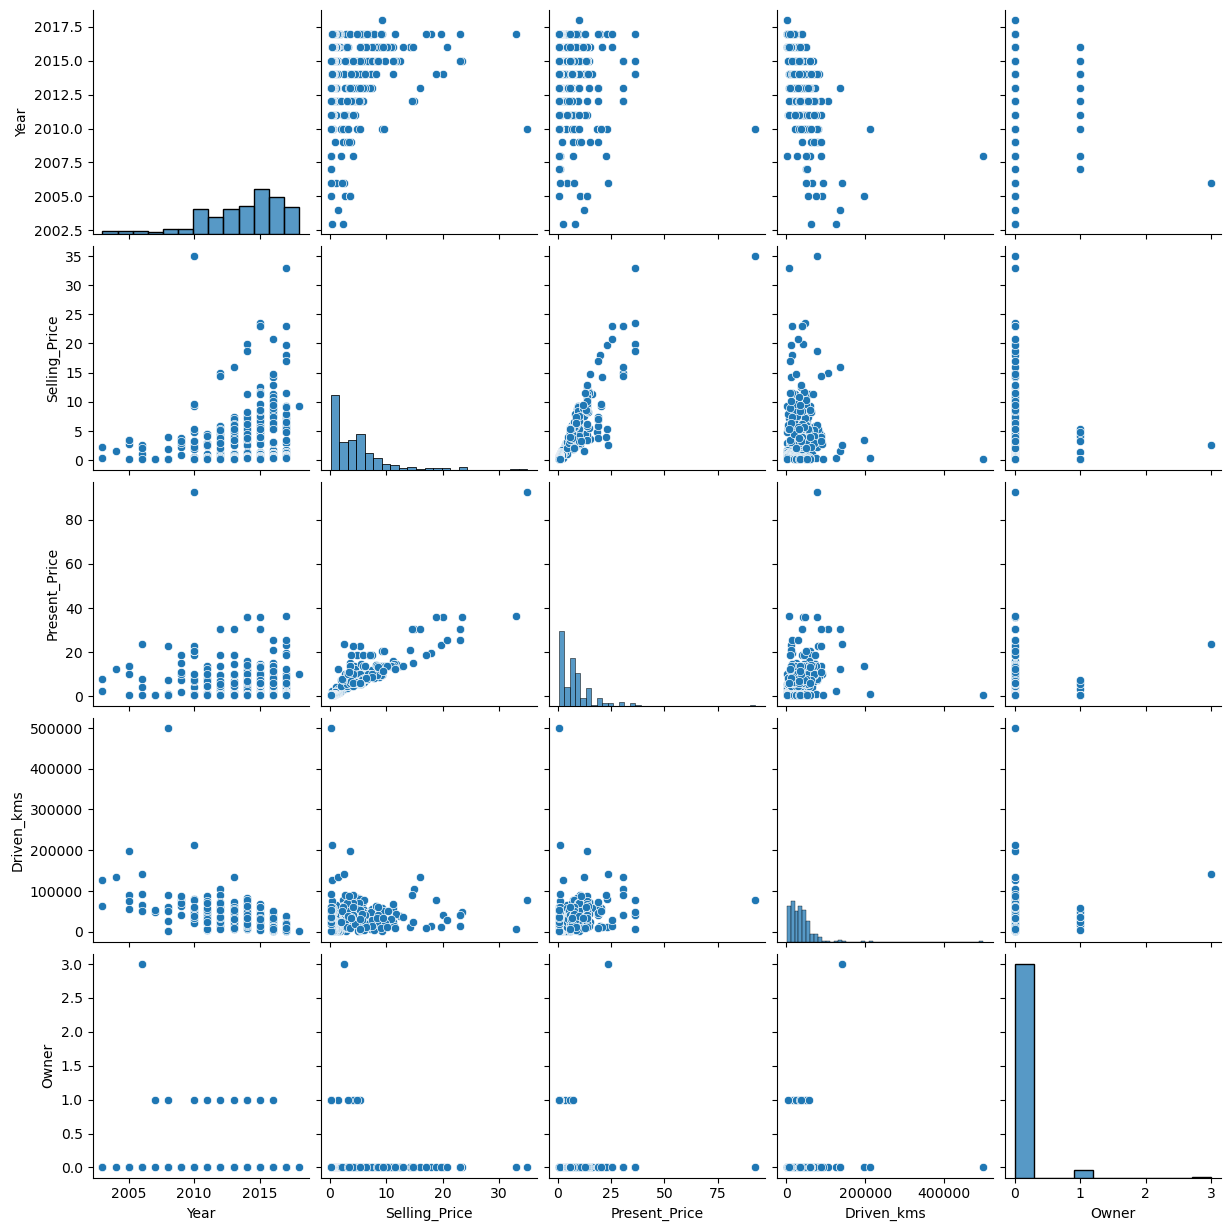

In [24]:
sns.pairplot(data)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h2><strong>Insights</strong></h2>

- This Dataset contains 0 Null values.
- Car Name column contains 98 unique values that explains there is 98 different cars are here for sale.
- land cruiser is Having the highest selling price in this data.
- Most of the cars has been came down fo sales at 2015.
- The highest Selling price is 35 but the present price is 92.
- Most of the diesel vehicles are having higher selling Prices.
- If a car already contains one or two owners, then the selling prices are very low to that cars.
- If a car contains a Larger amount of Driven_kms, It will Reduce the Selling Price.

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;"> Data Preprocesssing</span>
</h3>

In [33]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
data['car_name_encoded'] = data.groupby('Car_Name')['Selling_Price'].transform('mean')
data['Fuel_Type_encoded']= data.groupby('Fuel_Type')['Selling_Price'].transform('mean')
data['Selling_type_encoded'] = data.groupby('Selling_type')['Selling_Price'].transform('mean')
data['Transmission_encoded'] = data.groupby('Transmission')['Selling_Price'].transform('mean')


data.drop(columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], axis = 1, inplace = True)
     

In [47]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,car_name_encoded,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
0,2014,3.35,5.59,27000,0,2.862500,3.264184,6.721692,3.931992
1,2013,4.75,9.54,43000,0,3.158333,10.278500,6.721692,3.931992
2,2017,7.25,9.85,6900,0,7.472222,3.264184,6.721692,3.931992
3,2011,2.85,4.15,5200,0,2.512500,3.264184,6.721692,3.931992
4,2014,4.60,6.87,42450,0,4.540000,10.278500,6.721692,3.931992


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;"> Train Test Split</span>
</h3>

In [49]:
x = data.drop(columns = 'Selling_Price', axis = 1)
y = data['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;"> Model Selection</span>
</h3>

# Linear Regression 

In [51]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)

# Ridge 

In [55]:
r_model = Ridge()
r_model.fit(x_train, y_train)

y_pred_r = r_model.predict(x_test)

# Lasso 

In [56]:
l_model = Lasso()
l_model.fit(x_train, y_train)

y_pred_l = l_model.predict(x_test)

# Random Forest Regressor 

In [57]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

y_pred_rfr = rfr_model.predict(x_test)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: white;"> Model Performance</span>
</h3>

# Linear Regression 

In [63]:
print('R2 Score : ', r2_score(y_test,y_pred_lr))
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute Error : ', mean_absolute_error(y_test,y_pred_lr))

R2 Score :  0.9032661961105432
Mean Squared Error :  2.098560746558257
Mean Absolute Error :  1.0000524194979943


# Ridge 

In [64]:
print('R2 Score : ', r2_score(y_test,y_pred_r))
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred_r))
print('Mean Absolute Error : ', mean_absolute_error(y_test,y_pred_r))

R2 Score :  0.9044182922043722
Mean Squared Error :  2.0735669642240526
Mean Absolute Error :  0.9968523222236352


# Lasso 

In [65]:
print('R2 Score : ', r2_score(y_test,y_pred_l))
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred_l))
print('Mean Absolute Error : ', mean_absolute_error(y_test,y_pred_l))

R2 Score :  0.9169881943154429
Mean Squared Error :  1.8008732201786177
Mean Absolute Error :  0.8474478627018215


# Random Forest Regressor 

In [66]:
print('R2 Score : ', r2_score(y_test,y_pred_rfr))
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred_rfr))
print('Mean Absolute Error : ', mean_absolute_error(y_test,y_pred_rfr))

R2 Score :  0.9371295967190011
Mean Squared Error :  1.3639219708196733
Mean Absolute Error :  0.5873409836065576


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:green">
    <span style="color: black;">🎯 CONCLUSION 🎯 </span>
</h3>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h2><strong>Data Exploration:</strong></h2>

- The dataset contains 301 entries and 9 columns, including car details such as name, year, selling price, present price, driven kilometers, fuel type, selling type, transmission, and owner information.
-There are no missing values in the dataset.
- There are 98 unique car names and 16 unique years in the dataset.
- Most cars have manual transmission (261 out of 301).
- The car with the highest selling price is a "Land Cruiser" (selling price: 35) and the one with the lowest selling price is a "Bajaj Pulsar 150" (selling price: 0.1).
- The car with the lowest driven kilometers is a "Bajaj Avenger 220" (driven kilometers: 500), and the one with the highest - driven kilometers is an "Activa 3g" (driven kilometers: 500,000).

<h2><strong>Data Preprocessing:</strong></h2>

- Encoding categorical features like "Car_Name," "Fuel_Type," "Selling_type," and "Transmission" to numeric values based on their mean selling prices.
- Dropping the original categorical columns after encoding.

<h2><strong>Model Selection:</strong></h2></h2>

- Four different regression models were used for car price prediction: Linear Regression, Ridge Regression, Lasso Regression, and Random Forest Regressor.
Model Performance:

<h2><strong>Linear Regression:</strong></h2>

- R2 Score: 0.9033
- Mean Squared Error: 2.0986
- Mean Absolute Error: 1.0001
    
<h2><strong>Ridge Regression:</strong></h2>

 - R2 Score: 0.9044
 - Mean Squared Error: 2.0736
 - Mean Absolute Error: 0.9969

<h2><strong>Lasso Regression:</strong></h2>

 - R2 Score: 0.9170
 - Mean Squared Error: 1.8009
 - Mean Absolute Error: 0.8474
    
<h2><strong>Random Forest Regressor:</strong></h2>

 - R2 Score: 0.9371
 - Mean Squared Error: 1.3639
 - Mean Absolute Error: 0.5873
    
<h2><strong>Conclusion:<strong></h2>

- The Random Forest Regressor outperformed the other models in terms of R2 score, mean squared error, and mean absolute error, indicating its superior performance in predicting car prices.
- The dataset was preprocessed by encoding categorical features, which improved model performance.
- The insights from exploratory data analysis provide valuable information about the dataset, such as the most and least expensive cars, the impact of kilometers driven on price, and the distribution of car sales over the years.
- This project demonstrates the importance of data preprocessing, model selection, and evaluation for successful car price prediction.

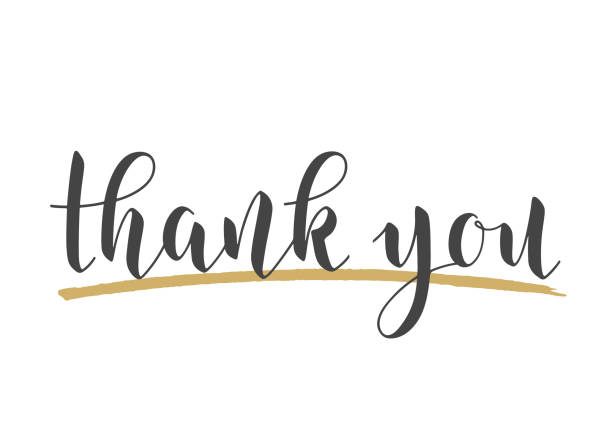